<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Mahdi Shafiei
### Student Number : 99109409
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1729]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')


# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [1730]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W': initializer(dim_in, dim_out),
            'b': np.zeros(dim_out),
            'reg': alpha if reg else 0
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x, mode='train'):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.dot(x, self.params['W'].T) + self.params['b']
        self.cache['y'] = y
        self.cache['x'] = x

        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_b = np.sum(upstream, axis=0)
        grad_w = np.dot(upstream.T, self.cache['x'])
        grad_x = np.dot(upstream, self.params['W'])
        grad_reg = 2 * self.params['reg'] * self.params['W']
        grad_reg_b = 2 * self.params['reg'] * self.params['b']

        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg,
            'reg_b': grad_reg_b
        }


In [1731]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(y, x))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [1732]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x, mode='train'):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.maximum(x, 0)
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = upstream * np.maximum(self.cache['x'], 0) / self.cache['x']

        self.grads['x'] = grad_x


In [1733]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)


Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[-0.          0.88325126 -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.          0.93640053 -0.          0.33644566]
 [ 0.87531923  0.36254974 -0.         -0.          0.96677731]
 [ 0.52121319  0.0189511  -0.          0.67793154  0.20010495]
 [-0.          0.46844046  0.26309046 -0.  

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [1734]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    #########################################
    ##              Your Code              ##
    #########################################
    return np.logaddexp.reduce(array, axis=axis)

In [1735]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x, mode='train'):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = x - logsumexp(x, axis=1).reshape(x.shape[0], 1)
        self.cache['x'] = x
        self.cache['y'] = y
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = np.exp(self.cache['y']) * np.sum(upstream, axis=1).reshape(np.exp(self.cache['y']).shape[0], 1) - upstream
        self.grads['x'] = grad_x


In [1736]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)


Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[ 0.25543381  0.14106689 -0.41398     0.12588516 -0.10840584]
 [ 0.20376161  0.15868754  0.08018071 -0.43744502 -0.00518484]
 [-0.11956483 -0.16874444 -0.31243645  0.01058303  0.59016269]
 [ 0.09121993 -0.20407432 -0.31101343 -0.00085981  0.42472763]
 [-0.28037124 -0.35101985  0.11664377  0.4851247   0.02962261]
 [ 0.29306479 -0.21679663  0.12605471  0.46

In [1737]:
class BatchNorm(Module):
    def __init__(self, dim_in, momentum=0.9, eps=1e-5):
        self.cache = dict()
        self.grads = dict()
        self.momentum = momentum
        self.eps = eps
        self.dim_in = dim_in
        self.params = {
            'gamma': np.ones(dim_in),
            'beta': np.zeros(dim_in),
            'running_mean': np.zeros(dim_in),
            'running_var': np.zeros(dim_in)
        }

    def _forward(self, x, mode='train'):
        self.cache['x'] = x
        N, D = x.shape
        running_mean = self.params['running_mean']
        running_var = self.params['running_var']
        momentum = self.momentum
        gamma = self.params['gamma']
        beta = self.params['beta']
        eps = self.eps
        if mode == 'train':
            sample_mean = x.mean(axis=0)
            sample_var = x.var(axis=0)
            running_mean = momentum * running_mean + (1 - momentum) * sample_mean
            running_var = momentum * running_var + (1 - momentum) * sample_var
            std = np.sqrt(sample_var + eps)
            x_centered = x - sample_mean  
            x_norm = x_centered / std
            y = gamma * x_norm + beta
            
            self.cache['x_norm'] = x_norm
            self.cache['x_centered'] = x_centered
            self.cache['std'] = std
            self.cache['gamma'] = gamma
            self.params['running_mean'] = running_mean
            self.params['running_var'] = running_var
        else:
            x_norm = (x - running_mean) / np.sqrt(running_var + eps)
            y = gamma * x_norm + beta

        return y

    def backward(self, upstream):
        N = upstream.shape[0]
        x_norm = self.cache['x_norm']
        x_centered = self.cache['x_centered']
        std = self.cache['std']
        gamma = self.cache['gamma']
    
        dgamma = (upstream * x_norm).sum(axis=0)
        dbeta = upstream.sum(axis=0)
    
        dx_norm = upstream * gamma
        dx = 1/N / std * (N * dx_norm - 
                      dx_norm.sum(axis=0) - 
                      x_norm * (dx_norm * x_norm).sum(axis=0))

        self.grads['x'] = dx
        self.grads['gamma'] = dgamma
        self.grads['beta'] = dbeta


## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [1738]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x, mode='train'):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            x = layer._forward(x, mode=mode)
        return x
    
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers[::-1]:
            layer.backward(upstream)
            upstream = layer.grads['x']
        return upstream

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        params = []
        for layer in self.layers:
            if hasattr(layer, 'params'):
                params.append(layer)
        return params

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [1739]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        bin_targets = np.zeros(logprobs.shape)
        for i in range(len(targets)):
            target = targets[i]
            bin_targets[i][target] = 1
        self.cache['targets'] = bin_targets
        self.cache['x'] = logprobs
        y = -np.sum(logprobs * bin_targets, axis=1) / targets.shape[0]
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad = -upstream * self.cache['targets'] / len(self.cache['targets'])
        
        self.grads['x'] = grad

In [1740]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)


Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.1 -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]]
Relative error of delta-loss:
1.418949593240605e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [1741]:
class Optimizer():
    """
    Our main optimization class.

    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self, epoch):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            if 'W' in layer.params:
                layer.params['W'] = layer.params['W'] - self.lr(epoch) * (layer.grads['W'] + layer.grads['reg'])
                layer.params['b'] = layer.params['b'] - self.lr(epoch) * (layer.grads['b'] + layer.grads['reg_b'])
            elif 'gamma' in layer.params:
                layer.params['beta'] = layer.params['beta'] - self.lr(epoch) * layer.grads['beta']
                layer.params['gamma'] = layer.params['gamma'] - self.lr(epoch) * layer.grads['gamma']

    def _momentum(self, epoch, momentum=0.95):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        self.updates = dict([])
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if 'W' in layer.params:
                update = self.lr(epoch) * (layer.grads['W'] + layer.grads['reg']) + momentum * self.updates.get((i, 'W'), 0)
                self.updates[(i, 'W')] = update
                layer.params['W'] = layer.params['W'] - update
                update = self.lr(epoch) * (layer.grads['b'] + layer.grads['reg_b']) + momentum * self.updates.get((i, 'b'), 0)
                self.updates[(i, 'b')] = update
                layer.params['b'] = layer.params['b'] - update
            elif 'gamma' in layer.params:
                update = self.lr(epoch) * layer.grads['gamma'] + momentum * self.updates.get((i, 'gamma'), 0)
                self.updates[(i, 'gamma')] = update
                layer.params['gamma'] = layer.params['gamma'] - update
                update = self.lr(epoch) * layer.grads['beta'] + momentum * self.updates.get((i, 'beta'), 0)
                self.updates[(i, 'beta')] = update
                layer.params['beta'] = layer.params['beta'] - update


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [1742]:
from os import chmod
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!chmod 755 cifar10_downloader.bash
!/content/cifar10_downloader.bash


In [1743]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [1744]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
mask = np.random.rand(4000) <= 0.1
data['X_val'] = data['X_train'][mask]
data['Y_val'] = data['Y_train'][mask]
data['X_train'] = data['X_train'][~mask]
data['Y_train'] = data['Y_train'][~mask]
##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (3619, 32, 32, 3)
Y_train: (3619,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (381, 32, 32, 3)
Y_val: (381,)


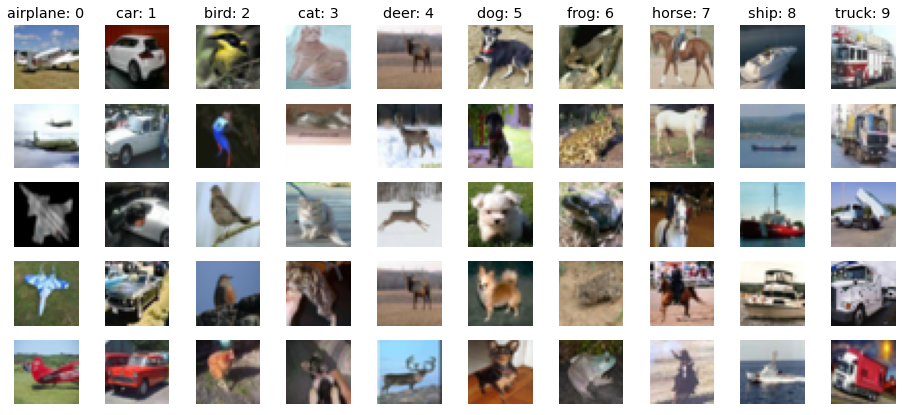

In [1745]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
images = [[] for i in range(10)]
added_images = 0
while added_images < 50:
    idx = np.random.randint(len(data['X_train']))
    y = data['Y_train'][idx]
    if len(images[y]) < 5:
        images[y].append(data['X_train'][idx])
        added_images = added_images + 1

labels = ['airplane: 0', 'car: 1', 'bird: 2', 'cat: 3', 'deer: 4', 
          'dog: 5', 'frog: 6', 'horse: 7', 'ship: 8', 'truck: 9']
fig = plt.figure(figsize=(16, 7))

for i in range(10):
    for j, X in enumerate(images[i]):
        fig.add_subplot(5, 10, 10 * j + i + 1)
        plt.imshow(X)
        if j == 0:
            plt.title(labels[i])
        plt.xticks([])
        plt.yticks([])
plt.show()


In [1746]:
#####################################################
##             Normalize and flatten X             ##
data['X_train'] = data['X_train'].transpose(3, 0, 1, 2)
for i in range(3):
    data['X_train'][i] = (data['X_train'][i] - np.mean(data['X_train'][i])) / np.std(data['X_train'][i])
data['X_train'] = data['X_train'].transpose(1, 0, 2, 3).reshape(data['X_train'].shape[1], 3072)

data['X_val'] = data['X_val'].transpose(3, 0, 1, 2)
for i in range(3):
    data['X_val'][i] = (data['X_val'][i] - np.mean(data['X_val'][i])) / np.std(data['X_val'][i])
data['X_val'] = data['X_val'].transpose(1, 0, 2, 3).reshape(data['X_val'].shape[1], 3072)

data['X_test'] = data['X_test'].transpose(3, 0, 1, 2)
for i in range(3):
    data['X_test'][i] = (data['X_test'][i] - np.mean(data['X_test'][i])) / np.std(data['X_test'][i])
data['X_test'] = data['X_test'].transpose(1, 0, 2, 3).reshape(data['X_test'].shape[1], 3072)

#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')


X_train: (3619, 3072)
Y_train: (3619,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (381, 3072)
Y_val: (381,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [1747]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, dtype):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            dtype : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{dtype}'
        self.y_key = f'Y_{dtype}'
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################
        indices = np.arange(len(dataset[self.x_key]))
        np.random.shuffle(indices)
        self.num_batches = int(np.ceil(len(indices) / batch_size))
        self.indices = np.array_split(indices, self.num_batches)

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [1748]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    conf_matrix = np.zeros(conf_matrix.shape)
    for i in range(len(reals)):
        y_real = reals[i]
        y_pred = preds[i]
        conf_matrix[y_real, y_pred] = conf_matrix[y_real, y_pred] + 1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix

    Returns:
        f1 : macro f1 score
    """
    f1_score = 0
    for i in range(len(confusion_matrix)):
        f1_score = f1_score + (2 * confusion_matrix[i, i]) / (np.sum(confusion_matrix[i]) + np.sum(confusion_matrix[:, i]))
    f1_score = f1_score / len(confusion_matrix)

    return f1_score


### Define Model
Define an MLP model to solve classification problem.

In [1749]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
def initializer(x, y):
    return np.random.normal(loc=0., scale=np.sqrt(2./y), size=(y, x))


model = MLPModel([
    LinearLayer(3072, 500, initializer, True, 40),
    BatchNorm(500),
    ReLU(),
    LinearLayer(500, 100, initializer, True, 30),
    BatchNorm(100),
    ReLU(),
    LinearLayer(100, 10, initializer, True, 0.5),
    LogSoftMax(),
])


In [1750]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 80
batch_size = 1000


def lr(epoch):
    return 0.025 * np.exp(-epoch * 6 / 50)


In [1751]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(model.get_parameters(), 'momentum', lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size, data, 'train')
val_sampler = RandomSampler(batch_size, data, 'val')
test_sampler = RandomSampler(batch_size, data, 'test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [1752]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    step = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = model._forward(x)
            loss = criterion._forward(logprobs, y)
            criterion.backward(1)
            loss_grad = -criterion.grads['x']
            model.backward(loss_grad)
            optimizer.step(epoch)
            total_loss = total_loss + np.sum(loss)
            predictions = np.argmax(logprobs, axis=1)
            confusion = update_confusion_matrix(confusion, predictions, y)
            step += 1
            f1 = f1_score(confusion)
            acc = np.count_nonzero(predictions == y) / len(y)
            train_str = f'Train {epoch + 1} | Loss:{total_loss / step:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|\n'
            pbar.set_description(train_str)
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/step)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    step = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            
            logprobs = model._forward(x)
            loss = criterion._forward(logprobs, y)
            total_loss = total_loss + np.sum(loss)
            predictions = np.argmax(logprobs, axis=1)
            confusion = update_confusion_matrix(confusion, predictions, y)
            step += 1
            f1 = f1_score(confusion)
            acc = np.count_nonzero(predictions == y) / len(y)
            train_str = f'Val {epoch + 1} | Loss:{total_loss / step:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|'
            pbar.set_description(train_str)
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/step)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    
    if f1 > best_f1:
            best_f1 = f1
            best_model = copy.deepcopy(model)
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

Train 1 | Loss:5.23e+00 | Acc: 0.11| F1: 0.10|
Train 1 | Loss:5.23e+00 | Acc: 0.11| F1: 0.10|
Train 1 | Loss:5.38e+00 | Acc: 0.08| F1: 0.07|
Train 1 | Loss:5.38e+00 | Acc: 0.08| F1: 0.07|
Train 1 | Loss:5.63e+00 | Acc: 0.07| F1: 0.06|
Train 1 | Loss:5.63e+00 | Acc: 0.07| F1: 0.06|
Train 1 | Loss:6.36e+00 | Acc: 0.06| F1: 0.04|
Train 1 | Loss:6.36e+00 | Acc: 0.06| F1: 0.04|
Train 1 | Loss:6.36e+00 | Acc: 0.06| F1: 0.04|
: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
Val 1 | Loss:1.15e+01 | Acc: 0.05| F1: 0.04|: 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:1.17e+01 | Acc: 0.05| F1: 0.04|
Train 2 | Loss:1.17e+01 | Acc: 0.05| F1: 0.04|
Train 2 | Loss:1.16e+01 | Acc: 0.04| F1: 0.03|
Train 2 | Loss:1.16e+01 | Acc: 0.04| F1: 0.03|
Train 2 | Loss:1.07e+01 | Acc: 0.05| F1: 0.04|
Train 2 | Loss:1.07e+01 | Acc: 0.05| F1: 0.04|
Train 2 | Loss:1.06e+01 | Acc: 0.06| F1: 0.05|
Train 2 | Loss:1.06e+01 | Acc: 0.06| F1: 0.05|
Train 2 | Loss:1.06e+01 | Acc: 0.06| F1: 0.05|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 2 | Loss:8.64e+00 | Acc: 0.05| F1: 0.04|: 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:8.68e+00 | Acc: 0.05| F1: 0.04|
Train 3 | Loss:8.68e+00 | Acc: 0.05| F1: 0.04|
Train 3 | Loss:8.69e+00 | Acc: 0.05| F1: 0.03|
Train 3 | Loss:8.69e+00 | Acc: 0.05| F1: 0.03|
Train 3 | Loss:8.93e+00 | Acc: 0.06| F1: 0.05|
Train 3 | Loss:8.93e+00 | Acc: 0.06| F1: 0.05|
Train 3 | Loss:8.90e+00 | Acc: 0.05| F1: 0.04|
Train 3 | Loss:8.90e+00 | Acc: 0.05| F1: 0.04|
Train 3 | Loss:8.90e+00 | Acc: 0.05| F1: 0.04|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 3 | Loss:7.16e+00 | Acc: 0.09| F1: 0.05|: 100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:7.40e+00 | Acc: 0.07| F1: 0.04|
Train 4 | Loss:7.40e+00 | Acc: 0.07| F1: 0.04|
Train 4 | Loss:6.95e+00 | Acc: 0.06| F1: 0.03|
Train 4 | Loss:6.95e+00 | Acc: 0.06| F1: 0.03|
Train 4 | Loss:6.72e+00 | Acc: 0.06| F1: 0.04|
Train 4 | Loss:6.72e+00 | Acc: 0.06| F1: 0.04|
Train 4 | Loss:6.91e+00 | Acc: 0.09| F1: 0.06|
Train 4 | Loss:6.91e+00 | Acc: 0.09| F1: 0.06|
Train 4 | Loss:6.91e+00 | Acc: 0.09| F1: 0.06|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 4 | Loss:6.55e+00 | Acc: 0.06| F1: 0.03|: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:6.73e+00 | Acc: 0.07| F1: 0.04|
Train 5 | Loss:6.73e+00 | Acc: 0.07| F1: 0.04|
Train 5 | Loss:5.87e+00 | Acc: 0.08| F1: 0.05|
Train 5 | Loss:5.87e+00 | Acc: 0.08| F1: 0.05|
Train 5 | Loss:5.63e+00 | Acc: 0.09| F1: 0.07|
Train 5 | Loss:5.63e+00 | Acc: 0.09| F1: 0.07|
Train 5 | Loss:5.47e+00 | Acc: 0.09| F1: 0.05|
Train 5 | Loss:5.47e+00 | Acc: 0.09| F1: 0.05|
Train 5 | Loss:5.47e+00 | Acc: 0.09| F1: 0.05|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 5 | Loss:4.84e+00 | Acc: 0.09| F1: 0.08|: 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:4.83e+00 | Acc: 0.08| F1: 0.06|
Train 6 | Loss:4.83e+00 | Acc: 0.08| F1: 0.06|
Train 6 | Loss:4.84e+00 | Acc: 0.09| F1: 0.07|
Train 6 | Loss:4.84e+00 | Acc: 0.09| F1: 0.07|
Train 6 | Loss:4.77e+00 | Acc: 0.09| F1: 0.05|
Train 6 | Loss:4.77e+00 | Acc: 0.09| F1: 0.05|
Train 6 | Loss:4.69e+00 | Acc: 0.07| F1: 0.04|
Train 6 | Loss:4.69e+00 | Acc: 0.07| F1: 0.04|
Train 6 | Loss:4.69e+00 | Acc: 0.07| F1: 0.04|
: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]
Val 6 | Loss:4.30e+00 | Acc: 0.13| F1: 0.10|: 100%|██████████| 1/1 [00:00<00:00, 15.91it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:4.83e+00 | Acc: 0.08| F1: 0.06|
Train 7 | Loss:4.83e+00 | Acc: 0.08| F1: 0.06|
Train 7 | Loss:4.41e+00 | Acc: 0.11| F1: 0.09|
Train 7 | Loss:4.41e+00 | Acc: 0.11| F1: 0.09|
Train 7 | Loss:4.26e+00 | Acc: 0.12| F1: 0.11|
Train 7 | Loss:4.26e+00 | Acc: 0.12| F1: 0.11|
Train 7 | Loss:4.19e+00 | Acc: 0.12| F1: 0.08|
Train 7 | Loss:4.19e+00 | Acc: 0.12| F1: 0.08|
Train 7 | Loss:4.19e+00 | Acc: 0.12| F1: 0.08|
: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
Val 7 | Loss:3.40e+00 | Acc: 0.10| F1: 0.09|: 100%|██████████| 1/1 [00:00<00:00, 16.34it/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:3.52e+00 | Acc: 0.11| F1: 0.10|
Train 8 | Loss:3.52e+00 | Acc: 0.11| F1: 0.10|
Train 8 | Loss:3.42e+00 | Acc: 0.15| F1: 0.12|
Train 8 | Loss:3.42e+00 | Acc: 0.15| F1: 0.12|
Train 8 | Loss:3.25e+00 | Acc: 0.17| F1: 0.13|
Train 8 | Loss:3.25e+00 | Acc: 0.17| F1: 0.13|
Train 8 | Loss:3.19e+00 | Acc: 0.11| F1: 0.11|
Train 8 | Loss:3.19e+00 | Acc: 0.11| F1: 0.11|
Train 8 | Loss:3.19e+00 | Acc: 0.11| F1: 0.11|
: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
Val 8 | Loss:3.09e+00 | Acc: 0.14| F1: 0.11|: 100%|██████████| 1/1 [00:00<00:00, 17.26it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:3.18e+00 | Acc: 0.14| F1: 0.10|
Train 9 | Loss:3.18e+00 | Acc: 0.14| F1: 0.10|
Train 9 | Loss:2.93e+00 | Acc: 0.22| F1: 0.17|
Train 9 | Loss:2.93e+00 | Acc: 0.22| F1: 0.17|
Train 9 | Loss:2.88e+00 | Acc: 0.17| F1: 0.15|
Train 9 | Loss:2.88e+00 | Acc: 0.17| F1: 0.15|
Train 9 | Loss:2.90e+00 | Acc: 0.13| F1: 0.11|
Train 9 | Loss:2.90e+00 | Acc: 0.13| F1: 0.11|
Train 9 | Loss:2.90e+00 | Acc: 0.13| F1: 0.11|
: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
Val 9 | Loss:2.70e+00 | Acc: 0.15| F1: 0.14|: 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:2.74e+00 | Acc: 0.15| F1: 0.14|
Train 10 | Loss:2.74e+00 | Acc: 0.15| F1: 0.14|
Train 10 | Loss:2.81e+00 | Acc: 0.17| F1: 0.17|
Train 10 | Loss:2.81e+00 | Acc: 0.17| F1: 0.17|
Train 10 | Loss:2.73e+00 | Acc: 0.17| F1: 0.14|
Train 10 | Loss:2.73e+00 | Acc: 0.17| F1: 0.14|
Train 10 | Loss:2.71e+00 | Acc: 0.16| F1: 0.13|
Train 10 | Loss:2.71e+00 | Acc: 0.16| F1: 0.13|
Train 10 | Loss:2.71e+00 | Acc: 0.16| F1: 0.13|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 10 | Loss:2.41e+00 | Acc: 0.16| F1: 0.12|: 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:2.56e+00 | Acc: 0.13| F1: 0.11|
Train 11 | Loss:2.56e+00 | Acc: 0.13| F1: 0.11|
Train 11 | Loss:2.43e+00 | Acc: 0.17| F1: 0.14|
Train 11 | Loss:2.43e+00 | Acc: 0.17| F1: 0.14|
Train 11 | Loss:2.67e+00 | Acc: 0.14| F1: 0.12|
Train 11 | Loss:2.67e+00 | Acc: 0.14| F1: 0.12|
Train 11 | Loss:2.71e+00 | Acc: 0.13| F1: 0.12|
Train 11 | Loss:2.71e+00 | Acc: 0.13| F1: 0.12|
Train 11 | Loss:2.71e+00 | Acc: 0.13| F1: 0.12|
: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]
Val 11 | Loss:2.34e+00 | Acc: 0.20| F1: 0.16|: 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:2.35e+00 | Acc: 0.22| F1: 0.17|
Train 12 | Loss:2.35e+00 | Acc: 0.22| F1: 0.17|
Train 12 | Loss:2.56e+00 | Acc: 0.13| F1: 0.12|
Train 12 | Loss:2.56e+00 | Acc: 0.13| F1: 0.12|
Train 12 | Loss:2.57e+00 | Acc: 0.18| F1: 0.14|
Train 12 | Loss:2.57e+00 | Acc: 0.18| F1: 0.14|
Train 12 | Loss:2.57e+00 | Acc: 0.13| F1: 0.12|
Train 12 | Loss:2.57e+00 | Acc: 0.13| F1: 0.12|
Train 12 | Loss:2.57e+00 | Acc: 0.13| F1: 0.12|
: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
Val 12 | Loss:2.48e+00 | Acc: 0.14| F1: 0.12|: 100%|██████████| 1/1 [00:00<00:00, 15.92it/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:2.53e+00 | Acc: 0.16| F1: 0.12|
Train 13 | Loss:2.53e+00 | Acc: 0.16| F1: 0.12|
Train 13 | Loss:2.49e+00 | Acc: 0.15| F1: 0.14|
Train 13 | Loss:2.49e+00 | Acc: 0.15| F1: 0.14|
Train 13 | Loss:2.51e+00 | Acc: 0.17| F1: 0.15|
Train 13 | Loss:2.51e+00 | Acc: 0.17| F1: 0.15|
Train 13 | Loss:2.47e+00 | Acc: 0.15| F1: 0.15|
Train 13 | Loss:2.47e+00 | Acc: 0.15| F1: 0.15|
Train 13 | Loss:2.47e+00 | Acc: 0.15| F1: 0.15|
: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
Val 13 | Loss:2.44e+00 | Acc: 0.16| F1: 0.13|: 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:2.48e+00 | Acc: 0.17| F1: 0.14|
Train 14 | Loss:2.48e+00 | Acc: 0.17| F1: 0.14|
Train 14 | Loss:2.45e+00 | Acc: 0.15| F1: 0.12|
Train 14 | Loss:2.45e+00 | Acc: 0.15| F1: 0.12|
Train 14 | Loss:2.45e+00 | Acc: 0.14| F1: 0.10|
Train 14 | Loss:2.45e+00 | Acc: 0.14| F1: 0.10|
Train 14 | Loss:2.42e+00 | Acc: 0.17| F1: 0.15|
Train 14 | Loss:2.42e+00 | Acc: 0.17| F1: 0.15|
Train 14 | Loss:2.42e+00 | Acc: 0.17| F1: 0.15|
: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]
Val 14 | Loss:2.47e+00 | Acc: 0.15| F1: 0.14|: 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:2.51e+00 | Acc: 0.17| F1: 0.16|
Train 15 | Loss:2.51e+00 | Acc: 0.17| F1: 0.16|
Train 15 | Loss:2.54e+00 | Acc: 0.13| F1: 0.11|
Train 15 | Loss:2.54e+00 | Acc: 0.13| F1: 0.11|
Train 15 | Loss:2.61e+00 | Acc: 0.17| F1: 0.14|
Train 15 | Loss:2.61e+00 | Acc: 0.17| F1: 0.14|
Train 15 | Loss:2.54e+00 | Acc: 0.16| F1: 0.13|
Train 15 | Loss:2.54e+00 | Acc: 0.16| F1: 0.13|
Train 15 | Loss:2.54e+00 | Acc: 0.16| F1: 0.13|
: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
Val 15 | Loss:2.17e+00 | Acc: 0.21| F1: 0.17|: 100%|██████████| 1/1 [00:00<00:00, 17.59it/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:2.17e+00 | Acc: 0.23| F1: 0.19|
Train 16 | Loss:2.17e+00 | Acc: 0.23| F1: 0.19|
Train 16 | Loss:2.15e+00 | Acc: 0.22| F1: 0.20|
Train 16 | Loss:2.15e+00 | Acc: 0.22| F1: 0.20|
Train 16 | Loss:2.19e+00 | Acc: 0.21| F1: 0.18|
Train 16 | Loss:2.19e+00 | Acc: 0.21| F1: 0.18|
Train 16 | Loss:2.24e+00 | Acc: 0.16| F1: 0.14|
Train 16 | Loss:2.24e+00 | Acc: 0.16| F1: 0.14|
Train 16 | Loss:2.24e+00 | Acc: 0.16| F1: 0.14|
: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
Val 16 | Loss:2.44e+00 | Acc: 0.18| F1: 0.15|: 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:2.48e+00 | Acc: 0.15| F1: 0.13|
Train 17 | Loss:2.48e+00 | Acc: 0.15| F1: 0.13|
Train 17 | Loss:2.46e+00 | Acc: 0.16| F1: 0.13|
Train 17 | Loss:2.46e+00 | Acc: 0.16| F1: 0.13|
Train 17 | Loss:2.37e+00 | Acc: 0.19| F1: 0.17|
Train 17 | Loss:2.37e+00 | Acc: 0.19| F1: 0.17|
Train 17 | Loss:2.30e+00 | Acc: 0.25| F1: 0.22|
Train 17 | Loss:2.30e+00 | Acc: 0.25| F1: 0.22|
Train 17 | Loss:2.30e+00 | Acc: 0.25| F1: 0.22|
: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
Val 17 | Loss:2.19e+00 | Acc: 0.22| F1: 0.20|: 100%|██████████| 1/1 [00:00<00:00, 15.53it/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:2.20e+00 | Acc: 0.20| F1: 0.18|
Train 18 | Loss:2.20e+00 | Acc: 0.20| F1: 0.18|
Train 18 | Loss:2.34e+00 | Acc: 0.16| F1: 0.15|
Train 18 | Loss:2.34e+00 | Acc: 0.16| F1: 0.15|
Train 18 | Loss:2.36e+00 | Acc: 0.18| F1: 0.14|
Train 18 | Loss:2.36e+00 | Acc: 0.18| F1: 0.14|
Train 18 | Loss:2.31e+00 | Acc: 0.20| F1: 0.17|
Train 18 | Loss:2.31e+00 | Acc: 0.20| F1: 0.17|
Train 18 | Loss:2.31e+00 | Acc: 0.20| F1: 0.17|
: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]
Val 18 | Loss:2.12e+00 | Acc: 0.22| F1: 0.20|: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:2.07e+00 | Acc: 0.26| F1: 0.24|
Train 19 | Loss:2.07e+00 | Acc: 0.26| F1: 0.24|
Train 19 | Loss:2.14e+00 | Acc: 0.20| F1: 0.18|
Train 19 | Loss:2.14e+00 | Acc: 0.20| F1: 0.18|
Train 19 | Loss:2.17e+00 | Acc: 0.22| F1: 0.21|
Train 19 | Loss:2.17e+00 | Acc: 0.22| F1: 0.21|
Train 19 | Loss:2.19e+00 | Acc: 0.23| F1: 0.18|
Train 19 | Loss:2.19e+00 | Acc: 0.23| F1: 0.18|
Train 19 | Loss:2.19e+00 | Acc: 0.23| F1: 0.18|
: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
Val 19 | Loss:2.33e+00 | Acc: 0.22| F1: 0.21|: 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:2.36e+00 | Acc: 0.21| F1: 0.20|
Train 20 | Loss:2.36e+00 | Acc: 0.21| F1: 0.20|
Train 20 | Loss:2.28e+00 | Acc: 0.26| F1: 0.25|
Train 20 | Loss:2.28e+00 | Acc: 0.26| F1: 0.25|
Train 20 | Loss:2.24e+00 | Acc: 0.25| F1: 0.21|
Train 20 | Loss:2.24e+00 | Acc: 0.25| F1: 0.21|
Train 20 | Loss:2.20e+00 | Acc: 0.25| F1: 0.21|
Train 20 | Loss:2.20e+00 | Acc: 0.25| F1: 0.21|
Train 20 | Loss:2.20e+00 | Acc: 0.25| F1: 0.21|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 20 | Loss:2.07e+00 | Acc: 0.24| F1: 0.23|: 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:2.01e+00 | Acc: 0.27| F1: 0.25|
Train 21 | Loss:2.01e+00 | Acc: 0.27| F1: 0.25|
Train 21 | Loss:2.02e+00 | Acc: 0.27| F1: 0.26|
Train 21 | Loss:2.02e+00 | Acc: 0.27| F1: 0.26|
Train 21 | Loss:2.07e+00 | Acc: 0.25| F1: 0.22|
Train 21 | Loss:2.07e+00 | Acc: 0.25| F1: 0.22|
Train 21 | Loss:2.12e+00 | Acc: 0.21| F1: 0.20|
Train 21 | Loss:2.12e+00 | Acc: 0.21| F1: 0.20|
Train 21 | Loss:2.12e+00 | Acc: 0.21| F1: 0.20|
: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]
Val 21 | Loss:2.11e+00 | Acc: 0.23| F1: 0.22|: 100%|██████████| 1/1 [00:00<00:00, 16.64it/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:2.13e+00 | Acc: 0.25| F1: 0.24|
Train 22 | Loss:2.13e+00 | Acc: 0.25| F1: 0.24|
Train 22 | Loss:2.06e+00 | Acc: 0.25| F1: 0.24|
Train 22 | Loss:2.06e+00 | Acc: 0.25| F1: 0.24|
Train 22 | Loss:2.06e+00 | Acc: 0.29| F1: 0.25|
Train 22 | Loss:2.06e+00 | Acc: 0.29| F1: 0.25|
Train 22 | Loss:2.05e+00 | Acc: 0.27| F1: 0.26|
Train 22 | Loss:2.05e+00 | Acc: 0.27| F1: 0.26|
Train 22 | Loss:2.05e+00 | Acc: 0.27| F1: 0.26|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 22 | Loss:2.02e+00 | Acc: 0.25| F1: 0.23|: 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:2.00e+00 | Acc: 0.30| F1: 0.28|
Train 23 | Loss:2.00e+00 | Acc: 0.30| F1: 0.28|
Train 23 | Loss:2.02e+00 | Acc: 0.29| F1: 0.27|
Train 23 | Loss:2.02e+00 | Acc: 0.29| F1: 0.27|
Train 23 | Loss:2.06e+00 | Acc: 0.28| F1: 0.25|
Train 23 | Loss:2.06e+00 | Acc: 0.28| F1: 0.25|
Train 23 | Loss:2.09e+00 | Acc: 0.22| F1: 0.21|
Train 23 | Loss:2.09e+00 | Acc: 0.22| F1: 0.21|
Train 23 | Loss:2.09e+00 | Acc: 0.22| F1: 0.21|
: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
Val 23 | Loss:2.03e+00 | Acc: 0.23| F1: 0.22|: 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:2.02e+00 | Acc: 0.28| F1: 0.26|
Train 24 | Loss:2.02e+00 | Acc: 0.28| F1: 0.26|
Train 24 | Loss:1.94e+00 | Acc: 0.35| F1: 0.33|
Train 24 | Loss:1.94e+00 | Acc: 0.35| F1: 0.33|
Train 24 | Loss:1.92e+00 | Acc: 0.33| F1: 0.30|
Train 24 | Loss:1.92e+00 | Acc: 0.33| F1: 0.30|
Train 24 | Loss:1.95e+00 | Acc: 0.26| F1: 0.24|
Train 24 | Loss:1.95e+00 | Acc: 0.26| F1: 0.24|
Train 24 | Loss:1.95e+00 | Acc: 0.26| F1: 0.24|
: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]
Val 24 | Loss:2.17e+00 | Acc: 0.27| F1: 0.25|: 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]


----------------------------[Epoch24 finished!]----------------------------


Train 25 | Loss:2.17e+00 | Acc: 0.23| F1: 0.21|
Train 25 | Loss:2.17e+00 | Acc: 0.23| F1: 0.21|
Train 25 | Loss:2.08e+00 | Acc: 0.29| F1: 0.26|
Train 25 | Loss:2.08e+00 | Acc: 0.29| F1: 0.26|
Train 25 | Loss:2.03e+00 | Acc: 0.34| F1: 0.30|
Train 25 | Loss:2.03e+00 | Acc: 0.34| F1: 0.30|
Train 25 | Loss:2.00e+00 | Acc: 0.28| F1: 0.27|
Train 25 | Loss:2.00e+00 | Acc: 0.28| F1: 0.27|
Train 25 | Loss:2.00e+00 | Acc: 0.28| F1: 0.27|
: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
Val 25 | Loss:2.20e+00 | Acc: 0.23| F1: 0.22|: 100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


----------------------------[Epoch25 finished!]----------------------------


Train 26 | Loss:2.17e+00 | Acc: 0.27| F1: 0.25|
Train 26 | Loss:2.17e+00 | Acc: 0.27| F1: 0.25|
Train 26 | Loss:2.08e+00 | Acc: 0.30| F1: 0.28|
Train 26 | Loss:2.08e+00 | Acc: 0.30| F1: 0.28|
Train 26 | Loss:2.03e+00 | Acc: 0.32| F1: 0.29|
Train 26 | Loss:2.03e+00 | Acc: 0.32| F1: 0.29|
Train 26 | Loss:2.00e+00 | Acc: 0.29| F1: 0.28|
Train 26 | Loss:2.00e+00 | Acc: 0.29| F1: 0.28|
Train 26 | Loss:2.00e+00 | Acc: 0.29| F1: 0.28|
: 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]
Val 26 | Loss:2.02e+00 | Acc: 0.29| F1: 0.27|: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


----------------------------[Epoch26 finished!]----------------------------


Train 27 | Loss:1.92e+00 | Acc: 0.32| F1: 0.31|
Train 27 | Loss:1.92e+00 | Acc: 0.32| F1: 0.31|
Train 27 | Loss:1.88e+00 | Acc: 0.33| F1: 0.33|
Train 27 | Loss:1.88e+00 | Acc: 0.33| F1: 0.33|
Train 27 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|
Train 27 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|
Train 27 | Loss:1.90e+00 | Acc: 0.29| F1: 0.28|
Train 27 | Loss:1.90e+00 | Acc: 0.29| F1: 0.28|
Train 27 | Loss:1.90e+00 | Acc: 0.29| F1: 0.28|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 27 | Loss:2.04e+00 | Acc: 0.24| F1: 0.23|: 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]


----------------------------[Epoch27 finished!]----------------------------


Train 28 | Loss:2.00e+00 | Acc: 0.26| F1: 0.24|
Train 28 | Loss:2.00e+00 | Acc: 0.26| F1: 0.24|
Train 28 | Loss:1.95e+00 | Acc: 0.33| F1: 0.32|
Train 28 | Loss:1.95e+00 | Acc: 0.33| F1: 0.32|
Train 28 | Loss:1.91e+00 | Acc: 0.35| F1: 0.34|
Train 28 | Loss:1.91e+00 | Acc: 0.35| F1: 0.34|
Train 28 | Loss:1.89e+00 | Acc: 0.32| F1: 0.31|
Train 28 | Loss:1.89e+00 | Acc: 0.32| F1: 0.31|
Train 28 | Loss:1.89e+00 | Acc: 0.32| F1: 0.31|
: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]
Val 28 | Loss:2.20e+00 | Acc: 0.24| F1: 0.21|: 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


----------------------------[Epoch28 finished!]----------------------------


Train 29 | Loss:2.07e+00 | Acc: 0.29| F1: 0.27|
Train 29 | Loss:2.07e+00 | Acc: 0.29| F1: 0.27|
Train 29 | Loss:1.98e+00 | Acc: 0.31| F1: 0.30|
Train 29 | Loss:1.98e+00 | Acc: 0.31| F1: 0.30|
Train 29 | Loss:1.92e+00 | Acc: 0.39| F1: 0.38|
Train 29 | Loss:1.92e+00 | Acc: 0.39| F1: 0.38|
Train 29 | Loss:1.88e+00 | Acc: 0.35| F1: 0.34|
Train 29 | Loss:1.88e+00 | Acc: 0.35| F1: 0.34|
Train 29 | Loss:1.88e+00 | Acc: 0.35| F1: 0.34|
: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]
Val 29 | Loss:2.00e+00 | Acc: 0.31| F1: 0.30|: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]


----------------------------[Epoch29 finished!]----------------------------


Train 30 | Loss:1.84e+00 | Acc: 0.35| F1: 0.34|
Train 30 | Loss:1.84e+00 | Acc: 0.35| F1: 0.34|
Train 30 | Loss:1.78e+00 | Acc: 0.39| F1: 0.39|
Train 30 | Loss:1.78e+00 | Acc: 0.39| F1: 0.39|
Train 30 | Loss:1.78e+00 | Acc: 0.36| F1: 0.35|
Train 30 | Loss:1.78e+00 | Acc: 0.36| F1: 0.35|
Train 30 | Loss:1.79e+00 | Acc: 0.36| F1: 0.35|
Train 30 | Loss:1.79e+00 | Acc: 0.36| F1: 0.35|
Train 30 | Loss:1.79e+00 | Acc: 0.36| F1: 0.35|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 30 | Loss:2.13e+00 | Acc: 0.27| F1: 0.26|: 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]


----------------------------[Epoch30 finished!]----------------------------


Train 31 | Loss:1.91e+00 | Acc: 0.35| F1: 0.33|
Train 31 | Loss:1.91e+00 | Acc: 0.35| F1: 0.33|
Train 31 | Loss:1.86e+00 | Acc: 0.36| F1: 0.36|
Train 31 | Loss:1.86e+00 | Acc: 0.36| F1: 0.36|
Train 31 | Loss:1.85e+00 | Acc: 0.39| F1: 0.38|
Train 31 | Loss:1.85e+00 | Acc: 0.39| F1: 0.38|
Train 31 | Loss:1.80e+00 | Acc: 0.40| F1: 0.40|
Train 31 | Loss:1.80e+00 | Acc: 0.40| F1: 0.40|
Train 31 | Loss:1.80e+00 | Acc: 0.40| F1: 0.40|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 31 | Loss:1.94e+00 | Acc: 0.29| F1: 0.29|: 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]


----------------------------[Epoch31 finished!]----------------------------


Train 32 | Loss:1.77e+00 | Acc: 0.37| F1: 0.37|
Train 32 | Loss:1.77e+00 | Acc: 0.37| F1: 0.37|
Train 32 | Loss:1.73e+00 | Acc: 0.41| F1: 0.41|
Train 32 | Loss:1.73e+00 | Acc: 0.41| F1: 0.41|
Train 32 | Loss:1.69e+00 | Acc: 0.43| F1: 0.42|
Train 32 | Loss:1.69e+00 | Acc: 0.43| F1: 0.42|
Train 32 | Loss:1.71e+00 | Acc: 0.37| F1: 0.37|
Train 32 | Loss:1.71e+00 | Acc: 0.37| F1: 0.37|
Train 32 | Loss:1.71e+00 | Acc: 0.37| F1: 0.37|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 32 | Loss:2.07e+00 | Acc: 0.28| F1: 0.27|: 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]


----------------------------[Epoch32 finished!]----------------------------


Train 33 | Loss:1.92e+00 | Acc: 0.34| F1: 0.32|
Train 33 | Loss:1.92e+00 | Acc: 0.34| F1: 0.32|
Train 33 | Loss:1.83e+00 | Acc: 0.39| F1: 0.38|
Train 33 | Loss:1.83e+00 | Acc: 0.39| F1: 0.38|
Train 33 | Loss:1.77e+00 | Acc: 0.43| F1: 0.42|
Train 33 | Loss:1.77e+00 | Acc: 0.43| F1: 0.42|
Train 33 | Loss:1.74e+00 | Acc: 0.40| F1: 0.39|
Train 33 | Loss:1.74e+00 | Acc: 0.40| F1: 0.39|
Train 33 | Loss:1.74e+00 | Acc: 0.40| F1: 0.39|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 33 | Loss:1.93e+00 | Acc: 0.32| F1: 0.31|: 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]


----------------------------[Epoch33 finished!]----------------------------


Train 34 | Loss:1.65e+00 | Acc: 0.41| F1: 0.40|
Train 34 | Loss:1.65e+00 | Acc: 0.41| F1: 0.40|
Train 34 | Loss:1.65e+00 | Acc: 0.41| F1: 0.41|
Train 34 | Loss:1.65e+00 | Acc: 0.41| F1: 0.41|
Train 34 | Loss:1.65e+00 | Acc: 0.42| F1: 0.40|
Train 34 | Loss:1.65e+00 | Acc: 0.42| F1: 0.40|
Train 34 | Loss:1.66e+00 | Acc: 0.39| F1: 0.38|
Train 34 | Loss:1.66e+00 | Acc: 0.39| F1: 0.38|
Train 34 | Loss:1.66e+00 | Acc: 0.39| F1: 0.38|
: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
Val 34 | Loss:1.95e+00 | Acc: 0.31| F1: 0.31|: 100%|██████████| 1/1 [00:00<00:00, 15.85it/s]


----------------------------[Epoch34 finished!]----------------------------


Train 35 | Loss:1.70e+00 | Acc: 0.40| F1: 0.40|
Train 35 | Loss:1.70e+00 | Acc: 0.40| F1: 0.40|
Train 35 | Loss:1.67e+00 | Acc: 0.42| F1: 0.42|
Train 35 | Loss:1.67e+00 | Acc: 0.42| F1: 0.42|
Train 35 | Loss:1.64e+00 | Acc: 0.46| F1: 0.45|
Train 35 | Loss:1.64e+00 | Acc: 0.46| F1: 0.45|
Train 35 | Loss:1.60e+00 | Acc: 0.48| F1: 0.47|
Train 35 | Loss:1.60e+00 | Acc: 0.48| F1: 0.47|
Train 35 | Loss:1.60e+00 | Acc: 0.48| F1: 0.47|
: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
Val 35 | Loss:1.91e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


----------------------------[Epoch35 finished!]----------------------------


Train 36 | Loss:1.59e+00 | Acc: 0.45| F1: 0.45|
Train 36 | Loss:1.59e+00 | Acc: 0.45| F1: 0.45|
Train 36 | Loss:1.59e+00 | Acc: 0.44| F1: 0.44|
Train 36 | Loss:1.59e+00 | Acc: 0.44| F1: 0.44|
Train 36 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|
Train 36 | Loss:1.55e+00 | Acc: 0.49| F1: 0.48|
Train 36 | Loss:1.54e+00 | Acc: 0.46| F1: 0.45|
Train 36 | Loss:1.54e+00 | Acc: 0.46| F1: 0.45|
Train 36 | Loss:1.54e+00 | Acc: 0.46| F1: 0.45|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 36 | Loss:2.07e+00 | Acc: 0.33| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


----------------------------[Epoch36 finished!]----------------------------


Train 37 | Loss:1.62e+00 | Acc: 0.44| F1: 0.42|
Train 37 | Loss:1.62e+00 | Acc: 0.44| F1: 0.42|
Train 37 | Loss:1.63e+00 | Acc: 0.43| F1: 0.43|
Train 37 | Loss:1.63e+00 | Acc: 0.43| F1: 0.43|
Train 37 | Loss:1.58e+00 | Acc: 0.49| F1: 0.47|
Train 37 | Loss:1.58e+00 | Acc: 0.49| F1: 0.47|
Train 37 | Loss:1.54e+00 | Acc: 0.51| F1: 0.51|
Train 37 | Loss:1.54e+00 | Acc: 0.51| F1: 0.51|
Train 37 | Loss:1.54e+00 | Acc: 0.51| F1: 0.51|
: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]
Val 37 | Loss:1.93e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 16.30it/s]


----------------------------[Epoch37 finished!]----------------------------


Train 38 | Loss:1.48e+00 | Acc: 0.46| F1: 0.46|
Train 38 | Loss:1.48e+00 | Acc: 0.46| F1: 0.46|
Train 38 | Loss:1.49e+00 | Acc: 0.47| F1: 0.47|
Train 38 | Loss:1.49e+00 | Acc: 0.47| F1: 0.47|
Train 38 | Loss:1.48e+00 | Acc: 0.51| F1: 0.50|
Train 38 | Loss:1.48e+00 | Acc: 0.51| F1: 0.50|
Train 38 | Loss:1.48e+00 | Acc: 0.49| F1: 0.49|
Train 38 | Loss:1.48e+00 | Acc: 0.49| F1: 0.49|
Train 38 | Loss:1.48e+00 | Acc: 0.49| F1: 0.49|
: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
Val 38 | Loss:2.04e+00 | Acc: 0.33| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]


----------------------------[Epoch38 finished!]----------------------------


Train 39 | Loss:1.59e+00 | Acc: 0.44| F1: 0.43|
Train 39 | Loss:1.59e+00 | Acc: 0.44| F1: 0.43|
Train 39 | Loss:1.52e+00 | Acc: 0.50| F1: 0.50|
Train 39 | Loss:1.52e+00 | Acc: 0.50| F1: 0.50|
Train 39 | Loss:1.47e+00 | Acc: 0.53| F1: 0.53|
Train 39 | Loss:1.47e+00 | Acc: 0.53| F1: 0.53|
Train 39 | Loss:1.44e+00 | Acc: 0.52| F1: 0.51|
Train 39 | Loss:1.44e+00 | Acc: 0.52| F1: 0.51|
Train 39 | Loss:1.44e+00 | Acc: 0.52| F1: 0.51|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 39 | Loss:1.96e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


----------------------------[Epoch39 finished!]----------------------------


Train 40 | Loss:1.43e+00 | Acc: 0.49| F1: 0.48|
Train 40 | Loss:1.43e+00 | Acc: 0.49| F1: 0.48|
Train 40 | Loss:1.40e+00 | Acc: 0.52| F1: 0.53|
Train 40 | Loss:1.40e+00 | Acc: 0.52| F1: 0.53|
Train 40 | Loss:1.37e+00 | Acc: 0.54| F1: 0.54|
Train 40 | Loss:1.37e+00 | Acc: 0.54| F1: 0.54|
Train 40 | Loss:1.35e+00 | Acc: 0.56| F1: 0.56|
Train 40 | Loss:1.35e+00 | Acc: 0.56| F1: 0.56|
Train 40 | Loss:1.35e+00 | Acc: 0.56| F1: 0.56|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 40 | Loss:1.91e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 16.21it/s]


----------------------------[Epoch40 finished!]----------------------------


Train 41 | Loss:1.38e+00 | Acc: 0.53| F1: 0.53|
Train 41 | Loss:1.38e+00 | Acc: 0.53| F1: 0.53|
Train 41 | Loss:1.39e+00 | Acc: 0.52| F1: 0.52|
Train 41 | Loss:1.39e+00 | Acc: 0.52| F1: 0.52|
Train 41 | Loss:1.36e+00 | Acc: 0.57| F1: 0.56|
Train 41 | Loss:1.36e+00 | Acc: 0.57| F1: 0.56|
Train 41 | Loss:1.31e+00 | Acc: 0.61| F1: 0.61|
Train 41 | Loss:1.31e+00 | Acc: 0.61| F1: 0.61|
Train 41 | Loss:1.31e+00 | Acc: 0.61| F1: 0.61|
: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
Val 41 | Loss:2.05e+00 | Acc: 0.31| F1: 0.31|: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]


----------------------------[Epoch41 finished!]----------------------------


Train 42 | Loss:1.40e+00 | Acc: 0.51| F1: 0.51|
Train 42 | Loss:1.40e+00 | Acc: 0.51| F1: 0.51|
Train 42 | Loss:1.34e+00 | Acc: 0.56| F1: 0.56|
Train 42 | Loss:1.34e+00 | Acc: 0.56| F1: 0.56|
Train 42 | Loss:1.31e+00 | Acc: 0.58| F1: 0.57|
Train 42 | Loss:1.31e+00 | Acc: 0.58| F1: 0.57|
Train 42 | Loss:1.27e+00 | Acc: 0.61| F1: 0.61|
Train 42 | Loss:1.27e+00 | Acc: 0.61| F1: 0.61|
Train 42 | Loss:1.27e+00 | Acc: 0.61| F1: 0.61|
: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]
Val 42 | Loss:1.95e+00 | Acc: 0.37| F1: 0.37|: 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]


----------------------------[Epoch42 finished!]----------------------------


Train 43 | Loss:1.36e+00 | Acc: 0.53| F1: 0.53|
Train 43 | Loss:1.36e+00 | Acc: 0.53| F1: 0.53|
Train 43 | Loss:1.26e+00 | Acc: 0.60| F1: 0.60|
Train 43 | Loss:1.26e+00 | Acc: 0.60| F1: 0.60|
Train 43 | Loss:1.24e+00 | Acc: 0.59| F1: 0.59|
Train 43 | Loss:1.24e+00 | Acc: 0.59| F1: 0.59|
Train 43 | Loss:1.24e+00 | Acc: 0.58| F1: 0.57|
Train 43 | Loss:1.24e+00 | Acc: 0.58| F1: 0.57|
Train 43 | Loss:1.24e+00 | Acc: 0.58| F1: 0.57|
: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
Val 43 | Loss:1.89e+00 | Acc: 0.34| F1: 0.33|: 100%|██████████| 1/1 [00:00<00:00, 17.04it/s]


----------------------------[Epoch43 finished!]----------------------------


Train 44 | Loss:1.28e+00 | Acc: 0.56| F1: 0.56|
Train 44 | Loss:1.28e+00 | Acc: 0.56| F1: 0.56|
Train 44 | Loss:1.23e+00 | Acc: 0.59| F1: 0.59|
Train 44 | Loss:1.23e+00 | Acc: 0.59| F1: 0.59|
Train 44 | Loss:1.20e+00 | Acc: 0.63| F1: 0.63|
Train 44 | Loss:1.20e+00 | Acc: 0.63| F1: 0.63|
Train 44 | Loss:1.20e+00 | Acc: 0.59| F1: 0.58|
Train 44 | Loss:1.20e+00 | Acc: 0.59| F1: 0.58|
Train 44 | Loss:1.20e+00 | Acc: 0.59| F1: 0.58|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 44 | Loss:2.06e+00 | Acc: 0.30| F1: 0.30|: 100%|██████████| 1/1 [00:00<00:00, 16.68it/s]


----------------------------[Epoch44 finished!]----------------------------


Train 45 | Loss:1.36e+00 | Acc: 0.53| F1: 0.53|
Train 45 | Loss:1.36e+00 | Acc: 0.53| F1: 0.53|
Train 45 | Loss:1.22e+00 | Acc: 0.65| F1: 0.64|
Train 45 | Loss:1.22e+00 | Acc: 0.65| F1: 0.64|
Train 45 | Loss:1.14e+00 | Acc: 0.69| F1: 0.69|
Train 45 | Loss:1.14e+00 | Acc: 0.69| F1: 0.69|
Train 45 | Loss:1.09e+00 | Acc: 0.70| F1: 0.70|
Train 45 | Loss:1.09e+00 | Acc: 0.70| F1: 0.70|
Train 45 | Loss:1.09e+00 | Acc: 0.70| F1: 0.70|
: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
Val 45 | Loss:2.04e+00 | Acc: 0.36| F1: 0.36|: 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


----------------------------[Epoch45 finished!]----------------------------


Train 46 | Loss:1.26e+00 | Acc: 0.57| F1: 0.57|
Train 46 | Loss:1.26e+00 | Acc: 0.57| F1: 0.57|
Train 46 | Loss:1.24e+00 | Acc: 0.57| F1: 0.58|
Train 46 | Loss:1.24e+00 | Acc: 0.57| F1: 0.58|
Train 46 | Loss:1.22e+00 | Acc: 0.61| F1: 0.61|
Train 46 | Loss:1.22e+00 | Acc: 0.61| F1: 0.61|
Train 46 | Loss:1.17e+00 | Acc: 0.69| F1: 0.68|
Train 46 | Loss:1.17e+00 | Acc: 0.69| F1: 0.68|
Train 46 | Loss:1.17e+00 | Acc: 0.69| F1: 0.68|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 46 | Loss:2.02e+00 | Acc: 0.32| F1: 0.32|: 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]


----------------------------[Epoch46 finished!]----------------------------


Train 47 | Loss:1.13e+00 | Acc: 0.64| F1: 0.63|
Train 47 | Loss:1.13e+00 | Acc: 0.64| F1: 0.63|
Train 47 | Loss:1.15e+00 | Acc: 0.61| F1: 0.62|
Train 47 | Loss:1.15e+00 | Acc: 0.61| F1: 0.62|
Train 47 | Loss:1.11e+00 | Acc: 0.69| F1: 0.69|
Train 47 | Loss:1.11e+00 | Acc: 0.69| F1: 0.69|
Train 47 | Loss:1.07e+00 | Acc: 0.69| F1: 0.69|
Train 47 | Loss:1.07e+00 | Acc: 0.69| F1: 0.69|
Train 47 | Loss:1.07e+00 | Acc: 0.69| F1: 0.69|
: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
Val 47 | Loss:2.01e+00 | Acc: 0.35| F1: 0.34|: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]


----------------------------[Epoch47 finished!]----------------------------


Train 48 | Loss:1.03e+00 | Acc: 0.67| F1: 0.67|
Train 48 | Loss:1.03e+00 | Acc: 0.67| F1: 0.67|
Train 48 | Loss:9.99e-01 | Acc: 0.69| F1: 0.69|
Train 48 | Loss:9.99e-01 | Acc: 0.69| F1: 0.69|
Train 48 | Loss:1.00e+00 | Acc: 0.69| F1: 0.68|
Train 48 | Loss:1.00e+00 | Acc: 0.69| F1: 0.68|
Train 48 | Loss:9.95e-01 | Acc: 0.68| F1: 0.68|
Train 48 | Loss:9.95e-01 | Acc: 0.68| F1: 0.68|
Train 48 | Loss:9.95e-01 | Acc: 0.68| F1: 0.68|
: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
Val 48 | Loss:1.94e+00 | Acc: 0.35| F1: 0.35|: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


----------------------------[Epoch48 finished!]----------------------------


Train 49 | Loss:9.79e-01 | Acc: 0.69| F1: 0.69|
Train 49 | Loss:9.79e-01 | Acc: 0.69| F1: 0.69|
Train 49 | Loss:9.05e-01 | Acc: 0.74| F1: 0.75|
Train 49 | Loss:9.05e-01 | Acc: 0.74| F1: 0.75|
Train 49 | Loss:8.82e-01 | Acc: 0.75| F1: 0.75|
Train 49 | Loss:8.82e-01 | Acc: 0.75| F1: 0.75|
Train 49 | Loss:9.49e-01 | Acc: 0.64| F1: 0.64|
Train 49 | Loss:9.49e-01 | Acc: 0.64| F1: 0.64|
Train 49 | Loss:9.49e-01 | Acc: 0.64| F1: 0.64|
: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
Val 49 | Loss:2.05e+00 | Acc: 0.33| F1: 0.33|: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]


----------------------------[Epoch49 finished!]----------------------------


Train 50 | Loss:1.27e+00 | Acc: 0.59| F1: 0.59|
Train 50 | Loss:1.27e+00 | Acc: 0.59| F1: 0.59|
Train 50 | Loss:1.15e+00 | Acc: 0.70| F1: 0.69|
Train 50 | Loss:1.15e+00 | Acc: 0.70| F1: 0.69|
Train 50 | Loss:1.06e+00 | Acc: 0.78| F1: 0.77|
Train 50 | Loss:1.06e+00 | Acc: 0.78| F1: 0.77|
Train 50 | Loss:9.86e-01 | Acc: 0.80| F1: 0.80|
Train 50 | Loss:9.86e-01 | Acc: 0.80| F1: 0.80|
Train 50 | Loss:9.86e-01 | Acc: 0.80| F1: 0.80|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 50 | Loss:1.93e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


----------------------------[Epoch50 finished!]----------------------------


Train 51 | Loss:8.54e-01 | Acc: 0.74| F1: 0.74|
Train 51 | Loss:8.54e-01 | Acc: 0.74| F1: 0.74|
Train 51 | Loss:8.88e-01 | Acc: 0.71| F1: 0.72|
Train 51 | Loss:8.88e-01 | Acc: 0.71| F1: 0.72|
Train 51 | Loss:9.03e-01 | Acc: 0.72| F1: 0.72|
Train 51 | Loss:9.03e-01 | Acc: 0.72| F1: 0.72|
Train 51 | Loss:8.87e-01 | Acc: 0.76| F1: 0.76|
Train 51 | Loss:8.87e-01 | Acc: 0.76| F1: 0.76|
Train 51 | Loss:8.87e-01 | Acc: 0.76| F1: 0.76|
: 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]
Val 51 | Loss:1.92e+00 | Acc: 0.38| F1: 0.38|: 100%|██████████| 1/1 [00:00<00:00, 15.25it/s]


----------------------------[Epoch51 finished!]----------------------------


Train 52 | Loss:8.11e-01 | Acc: 0.76| F1: 0.75|
Train 52 | Loss:8.11e-01 | Acc: 0.76| F1: 0.75|
Train 52 | Loss:8.05e-01 | Acc: 0.75| F1: 0.75|
Train 52 | Loss:8.05e-01 | Acc: 0.75| F1: 0.75|
Train 52 | Loss:8.29e-01 | Acc: 0.72| F1: 0.72|
Train 52 | Loss:8.29e-01 | Acc: 0.72| F1: 0.72|
Train 52 | Loss:8.39e-01 | Acc: 0.74| F1: 0.74|
Train 52 | Loss:8.39e-01 | Acc: 0.74| F1: 0.74|
Train 52 | Loss:8.39e-01 | Acc: 0.74| F1: 0.74|
: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
Val 52 | Loss:1.90e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]


----------------------------[Epoch52 finished!]----------------------------


Train 53 | Loss:8.59e-01 | Acc: 0.75| F1: 0.74|
Train 53 | Loss:8.59e-01 | Acc: 0.75| F1: 0.74|
Train 53 | Loss:8.07e-01 | Acc: 0.80| F1: 0.80|
Train 53 | Loss:8.07e-01 | Acc: 0.80| F1: 0.80|
Train 53 | Loss:7.62e-01 | Acc: 0.82| F1: 0.81|
Train 53 | Loss:7.62e-01 | Acc: 0.82| F1: 0.81|
Train 53 | Loss:7.32e-01 | Acc: 0.81| F1: 0.81|
Train 53 | Loss:7.32e-01 | Acc: 0.81| F1: 0.81|
Train 53 | Loss:7.32e-01 | Acc: 0.81| F1: 0.81|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 53 | Loss:2.03e+00 | Acc: 0.38| F1: 0.38|: 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


----------------------------[Epoch53 finished!]----------------------------


Train 54 | Loss:8.37e-01 | Acc: 0.72| F1: 0.74|
Train 54 | Loss:8.37e-01 | Acc: 0.72| F1: 0.74|
Train 54 | Loss:7.91e-01 | Acc: 0.79| F1: 0.79|
Train 54 | Loss:7.91e-01 | Acc: 0.79| F1: 0.79|
Train 54 | Loss:7.49e-01 | Acc: 0.83| F1: 0.82|
Train 54 | Loss:7.49e-01 | Acc: 0.83| F1: 0.82|
Train 54 | Loss:7.22e-01 | Acc: 0.82| F1: 0.81|
Train 54 | Loss:7.22e-01 | Acc: 0.82| F1: 0.81|
Train 54 | Loss:7.22e-01 | Acc: 0.82| F1: 0.81|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 54 | Loss:2.02e+00 | Acc: 0.38| F1: 0.38|: 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]


----------------------------[Epoch54 finished!]----------------------------


Train 55 | Loss:7.48e-01 | Acc: 0.79| F1: 0.78|
Train 55 | Loss:7.48e-01 | Acc: 0.79| F1: 0.78|
Train 55 | Loss:7.01e-01 | Acc: 0.82| F1: 0.82|
Train 55 | Loss:7.01e-01 | Acc: 0.82| F1: 0.82|
Train 55 | Loss:6.51e-01 | Acc: 0.88| F1: 0.87|
Train 55 | Loss:6.51e-01 | Acc: 0.88| F1: 0.87|
Train 55 | Loss:6.26e-01 | Acc: 0.87| F1: 0.87|
Train 55 | Loss:6.26e-01 | Acc: 0.87| F1: 0.87|
Train 55 | Loss:6.26e-01 | Acc: 0.87| F1: 0.87|
: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
Val 55 | Loss:2.00e+00 | Acc: 0.37| F1: 0.37|: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


----------------------------[Epoch55 finished!]----------------------------


Train 56 | Loss:6.33e-01 | Acc: 0.84| F1: 0.83|
Train 56 | Loss:6.33e-01 | Acc: 0.84| F1: 0.83|
Train 56 | Loss:6.42e-01 | Acc: 0.81| F1: 0.82|
Train 56 | Loss:6.42e-01 | Acc: 0.81| F1: 0.82|
Train 56 | Loss:6.22e-01 | Acc: 0.85| F1: 0.84|
Train 56 | Loss:6.22e-01 | Acc: 0.85| F1: 0.84|
Train 56 | Loss:6.08e-01 | Acc: 0.85| F1: 0.85|
Train 56 | Loss:6.08e-01 | Acc: 0.85| F1: 0.85|
Train 56 | Loss:6.08e-01 | Acc: 0.85| F1: 0.85|
: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
Val 56 | Loss:2.04e+00 | Acc: 0.36| F1: 0.36|: 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]


----------------------------[Epoch56 finished!]----------------------------


Train 57 | Loss:6.81e-01 | Acc: 0.82| F1: 0.81|
Train 57 | Loss:6.81e-01 | Acc: 0.82| F1: 0.81|
Train 57 | Loss:6.53e-01 | Acc: 0.83| F1: 0.84|
Train 57 | Loss:6.53e-01 | Acc: 0.83| F1: 0.84|
Train 57 | Loss:6.20e-01 | Acc: 0.88| F1: 0.88|
Train 57 | Loss:6.20e-01 | Acc: 0.88| F1: 0.88|
Train 57 | Loss:5.82e-01 | Acc: 0.90| F1: 0.90|
Train 57 | Loss:5.82e-01 | Acc: 0.90| F1: 0.90|
Train 57 | Loss:5.82e-01 | Acc: 0.90| F1: 0.90|
: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
Val 57 | Loss:1.96e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


----------------------------[Epoch57 finished!]----------------------------


Train 58 | Loss:5.22e-01 | Acc: 0.86| F1: 0.85|
Train 58 | Loss:5.22e-01 | Acc: 0.86| F1: 0.85|
Train 58 | Loss:5.25e-01 | Acc: 0.87| F1: 0.87|
Train 58 | Loss:5.25e-01 | Acc: 0.87| F1: 0.87|
Train 58 | Loss:5.24e-01 | Acc: 0.88| F1: 0.88|
Train 58 | Loss:5.24e-01 | Acc: 0.88| F1: 0.88|
Train 58 | Loss:5.01e-01 | Acc: 0.92| F1: 0.92|
Train 58 | Loss:5.01e-01 | Acc: 0.92| F1: 0.92|
Train 58 | Loss:5.01e-01 | Acc: 0.92| F1: 0.92|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 58 | Loss:1.95e+00 | Acc: 0.40| F1: 0.40|: 100%|██████████| 1/1 [00:00<00:00, 16.04it/s]


----------------------------[Epoch58 finished!]----------------------------


Train 59 | Loss:4.55e-01 | Acc: 0.91| F1: 0.90|
Train 59 | Loss:4.55e-01 | Acc: 0.91| F1: 0.90|
Train 59 | Loss:4.57e-01 | Acc: 0.90| F1: 0.90|
Train 59 | Loss:4.57e-01 | Acc: 0.90| F1: 0.90|
Train 59 | Loss:4.67e-01 | Acc: 0.89| F1: 0.89|
Train 59 | Loss:4.67e-01 | Acc: 0.89| F1: 0.89|
Train 59 | Loss:4.64e-01 | Acc: 0.89| F1: 0.89|
Train 59 | Loss:4.64e-01 | Acc: 0.89| F1: 0.89|
Train 59 | Loss:4.64e-01 | Acc: 0.89| F1: 0.89|
: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
Val 59 | Loss:1.96e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]


----------------------------[Epoch59 finished!]----------------------------


Train 60 | Loss:4.74e-01 | Acc: 0.90| F1: 0.89|
Train 60 | Loss:4.74e-01 | Acc: 0.90| F1: 0.89|
Train 60 | Loss:4.52e-01 | Acc: 0.91| F1: 0.92|
Train 60 | Loss:4.52e-01 | Acc: 0.91| F1: 0.92|
Train 60 | Loss:4.35e-01 | Acc: 0.92| F1: 0.92|
Train 60 | Loss:4.35e-01 | Acc: 0.92| F1: 0.92|
Train 60 | Loss:4.28e-01 | Acc: 0.91| F1: 0.91|
Train 60 | Loss:4.28e-01 | Acc: 0.91| F1: 0.91|
Train 60 | Loss:4.28e-01 | Acc: 0.91| F1: 0.91|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 60 | Loss:2.04e+00 | Acc: 0.41| F1: 0.40|: 100%|██████████| 1/1 [00:00<00:00, 15.07it/s]


----------------------------[Epoch60 finished!]----------------------------


Train 61 | Loss:5.10e-01 | Acc: 0.87| F1: 0.87|
Train 61 | Loss:5.10e-01 | Acc: 0.87| F1: 0.87|
Train 61 | Loss:4.87e-01 | Acc: 0.90| F1: 0.90|
Train 61 | Loss:4.87e-01 | Acc: 0.90| F1: 0.90|
Train 61 | Loss:4.59e-01 | Acc: 0.92| F1: 0.92|
Train 61 | Loss:4.59e-01 | Acc: 0.92| F1: 0.92|
Train 61 | Loss:4.39e-01 | Acc: 0.93| F1: 0.93|
Train 61 | Loss:4.39e-01 | Acc: 0.93| F1: 0.93|
Train 61 | Loss:4.39e-01 | Acc: 0.93| F1: 0.93|
: 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]
Val 61 | Loss:1.96e+00 | Acc: 0.43| F1: 0.43|: 100%|██████████| 1/1 [00:00<00:00, 14.25it/s]


----------------------------[Epoch61 finished!]----------------------------


Train 62 | Loss:3.90e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.90e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.87e-01 | Acc: 0.94| F1: 0.94|
Train 62 | Loss:3.87e-01 | Acc: 0.94| F1: 0.94|
Train 62 | Loss:3.83e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.83e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.78e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.78e-01 | Acc: 0.93| F1: 0.93|
Train 62 | Loss:3.78e-01 | Acc: 0.93| F1: 0.93|
: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
Val 62 | Loss:1.98e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]


----------------------------[Epoch62 finished!]----------------------------


Train 63 | Loss:3.76e-01 | Acc: 0.93| F1: 0.93|
Train 63 | Loss:3.76e-01 | Acc: 0.93| F1: 0.93|
Train 63 | Loss:3.69e-01 | Acc: 0.94| F1: 0.94|
Train 63 | Loss:3.69e-01 | Acc: 0.94| F1: 0.94|
Train 63 | Loss:3.57e-01 | Acc: 0.96| F1: 0.96|
Train 63 | Loss:3.57e-01 | Acc: 0.96| F1: 0.96|
Train 63 | Loss:3.49e-01 | Acc: 0.94| F1: 0.94|
Train 63 | Loss:3.49e-01 | Acc: 0.94| F1: 0.94|
Train 63 | Loss:3.49e-01 | Acc: 0.94| F1: 0.94|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 63 | Loss:2.03e+00 | Acc: 0.40| F1: 0.40|: 100%|██████████| 1/1 [00:00<00:00, 15.08it/s]


----------------------------[Epoch63 finished!]----------------------------


Train 64 | Loss:3.79e-01 | Acc: 0.94| F1: 0.94|
Train 64 | Loss:3.79e-01 | Acc: 0.94| F1: 0.94|
Train 64 | Loss:3.74e-01 | Acc: 0.93| F1: 0.93|
Train 64 | Loss:3.74e-01 | Acc: 0.93| F1: 0.93|
Train 64 | Loss:3.61e-01 | Acc: 0.96| F1: 0.96|
Train 64 | Loss:3.61e-01 | Acc: 0.96| F1: 0.96|
Train 64 | Loss:3.50e-01 | Acc: 0.95| F1: 0.95|
Train 64 | Loss:3.50e-01 | Acc: 0.95| F1: 0.95|
Train 64 | Loss:3.50e-01 | Acc: 0.95| F1: 0.95|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 64 | Loss:2.01e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]


----------------------------[Epoch64 finished!]----------------------------


Train 65 | Loss:3.43e-01 | Acc: 0.96| F1: 0.96|
Train 65 | Loss:3.43e-01 | Acc: 0.96| F1: 0.96|
Train 65 | Loss:3.35e-01 | Acc: 0.95| F1: 0.96|
Train 65 | Loss:3.35e-01 | Acc: 0.95| F1: 0.96|
Train 65 | Loss:3.23e-01 | Acc: 0.97| F1: 0.97|
Train 65 | Loss:3.23e-01 | Acc: 0.97| F1: 0.97|
Train 65 | Loss:3.12e-01 | Acc: 0.96| F1: 0.96|
Train 65 | Loss:3.12e-01 | Acc: 0.96| F1: 0.96|
Train 65 | Loss:3.12e-01 | Acc: 0.96| F1: 0.96|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 65 | Loss:2.01e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 16.20it/s]


----------------------------[Epoch65 finished!]----------------------------


Train 66 | Loss:3.16e-01 | Acc: 0.97| F1: 0.96|
Train 66 | Loss:3.16e-01 | Acc: 0.97| F1: 0.96|
Train 66 | Loss:3.15e-01 | Acc: 0.96| F1: 0.96|
Train 66 | Loss:3.15e-01 | Acc: 0.96| F1: 0.96|
Train 66 | Loss:3.07e-01 | Acc: 0.97| F1: 0.97|
Train 66 | Loss:3.07e-01 | Acc: 0.97| F1: 0.97|
Train 66 | Loss:2.98e-01 | Acc: 0.97| F1: 0.97|
Train 66 | Loss:2.98e-01 | Acc: 0.97| F1: 0.97|
Train 66 | Loss:2.98e-01 | Acc: 0.97| F1: 0.97|
: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
Val 66 | Loss:2.02e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]


----------------------------[Epoch66 finished!]----------------------------


Train 67 | Loss:3.04e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:3.04e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:3.03e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:3.03e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:2.95e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:2.95e-01 | Acc: 0.97| F1: 0.97|
Train 67 | Loss:2.85e-01 | Acc: 0.98| F1: 0.98|
Train 67 | Loss:2.85e-01 | Acc: 0.98| F1: 0.98|
Train 67 | Loss:2.85e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]
Val 67 | Loss:2.01e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]


----------------------------[Epoch67 finished!]----------------------------


Train 68 | Loss:2.89e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.89e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.88e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.88e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.82e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.82e-01 | Acc: 0.97| F1: 0.97|
Train 68 | Loss:2.74e-01 | Acc: 0.98| F1: 0.98|
Train 68 | Loss:2.74e-01 | Acc: 0.98| F1: 0.98|
Train 68 | Loss:2.74e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]
Val 68 | Loss:2.02e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


----------------------------[Epoch68 finished!]----------------------------


Train 69 | Loss:2.82e-01 | Acc: 0.98| F1: 0.97|
Train 69 | Loss:2.82e-01 | Acc: 0.98| F1: 0.97|
Train 69 | Loss:2.81e-01 | Acc: 0.97| F1: 0.97|
Train 69 | Loss:2.81e-01 | Acc: 0.97| F1: 0.97|
Train 69 | Loss:2.75e-01 | Acc: 0.97| F1: 0.97|
Train 69 | Loss:2.75e-01 | Acc: 0.97| F1: 0.97|
Train 69 | Loss:2.67e-01 | Acc: 0.98| F1: 0.98|
Train 69 | Loss:2.67e-01 | Acc: 0.98| F1: 0.98|
Train 69 | Loss:2.67e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 69 | Loss:2.02e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]


----------------------------[Epoch69 finished!]----------------------------


Train 70 | Loss:2.76e-01 | Acc: 0.98| F1: 0.97|
Train 70 | Loss:2.76e-01 | Acc: 0.98| F1: 0.97|
Train 70 | Loss:2.75e-01 | Acc: 0.97| F1: 0.97|
Train 70 | Loss:2.75e-01 | Acc: 0.97| F1: 0.97|
Train 70 | Loss:2.69e-01 | Acc: 0.98| F1: 0.98|
Train 70 | Loss:2.69e-01 | Acc: 0.98| F1: 0.98|
Train 70 | Loss:2.61e-01 | Acc: 0.98| F1: 0.98|
Train 70 | Loss:2.61e-01 | Acc: 0.98| F1: 0.98|
Train 70 | Loss:2.61e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
Val 70 | Loss:2.03e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]


----------------------------[Epoch70 finished!]----------------------------


Train 71 | Loss:2.71e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.71e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.69e-01 | Acc: 0.97| F1: 0.97|
Train 71 | Loss:2.69e-01 | Acc: 0.97| F1: 0.97|
Train 71 | Loss:2.64e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.64e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.55e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.55e-01 | Acc: 0.98| F1: 0.98|
Train 71 | Loss:2.55e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 71 | Loss:2.03e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


----------------------------[Epoch71 finished!]----------------------------


Train 72 | Loss:2.66e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.66e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.64e-01 | Acc: 0.97| F1: 0.97|
Train 72 | Loss:2.64e-01 | Acc: 0.97| F1: 0.97|
Train 72 | Loss:2.59e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.59e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.51e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.51e-01 | Acc: 0.98| F1: 0.98|
Train 72 | Loss:2.51e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
Val 72 | Loss:2.03e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]


----------------------------[Epoch72 finished!]----------------------------


Train 73 | Loss:2.61e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.61e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.60e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.60e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.55e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.55e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 73 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 73 | Loss:2.03e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


----------------------------[Epoch73 finished!]----------------------------


Train 74 | Loss:2.57e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.57e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.56e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.56e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.51e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.51e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.43e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.43e-01 | Acc: 0.98| F1: 0.98|
Train 74 | Loss:2.43e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
Val 74 | Loss:2.03e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]


----------------------------[Epoch74 finished!]----------------------------


Train 75 | Loss:2.53e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.53e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.53e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.53e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.48e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.48e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 75 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
Val 75 | Loss:2.03e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]


----------------------------[Epoch75 finished!]----------------------------


Train 76 | Loss:2.50e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.50e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.49e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.49e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.45e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.45e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.37e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.37e-01 | Acc: 0.98| F1: 0.98|
Train 76 | Loss:2.37e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]
Val 76 | Loss:2.03e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


----------------------------[Epoch76 finished!]----------------------------


Train 77 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.47e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.42e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.42e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.34e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.34e-01 | Acc: 0.98| F1: 0.98|
Train 77 | Loss:2.34e-01 | Acc: 0.98| F1: 0.98|
: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
Val 77 | Loss:2.04e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]


----------------------------[Epoch77 finished!]----------------------------


Train 78 | Loss:2.45e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.45e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.44e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.44e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 78 | Loss:2.32e-01 | Acc: 0.99| F1: 0.99|
Train 78 | Loss:2.32e-01 | Acc: 0.99| F1: 0.99|
Train 78 | Loss:2.32e-01 | Acc: 0.99| F1: 0.99|
: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
Val 78 | Loss:2.04e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


----------------------------[Epoch78 finished!]----------------------------


Train 79 | Loss:2.43e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.43e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.42e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.42e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.38e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.38e-01 | Acc: 0.98| F1: 0.98|
Train 79 | Loss:2.30e-01 | Acc: 0.99| F1: 0.99|
Train 79 | Loss:2.30e-01 | Acc: 0.99| F1: 0.99|
Train 79 | Loss:2.30e-01 | Acc: 0.99| F1: 0.99|
: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
Val 79 | Loss:2.04e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


----------------------------[Epoch79 finished!]----------------------------


Train 80 | Loss:2.41e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.41e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.40e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.36e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.36e-01 | Acc: 0.98| F1: 0.98|
Train 80 | Loss:2.28e-01 | Acc: 0.99| F1: 0.99|
Train 80 | Loss:2.28e-01 | Acc: 0.99| F1: 0.99|
Train 80 | Loss:2.28e-01 | Acc: 0.99| F1: 0.99|
: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
Val 80 | Loss:2.04e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 1/1 [00:00<00:00, 16.16it/s]

----------------------------[Epoch80 finished!]----------------------------


### Test Model

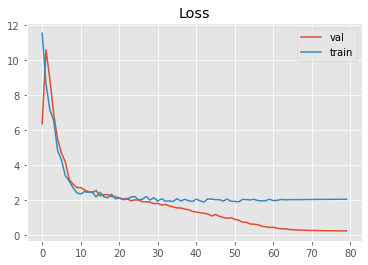

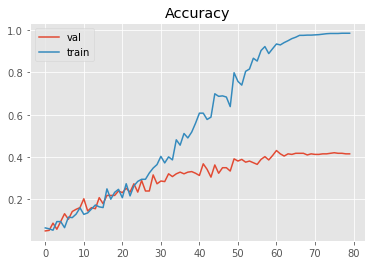

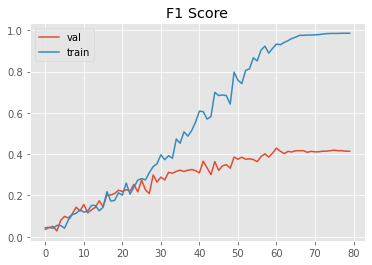

In [1753]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.title('Loss')
plt.show()
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.plot(train_f1, label='train')
plt.plot(val_f1, label='val')
plt.legend()
plt.title('F1 Score')
plt.show()

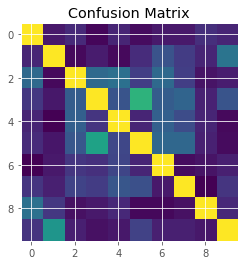

Loss:     1.7530140128408265
Accuracy: 0.43
F1 Score: 0.4306506094743021


In [1754]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
logprobs = best_model._forward(data['X_test'], mode='test')
loss = np.sum(criterion._forward(logprobs, data['Y_test']))
predictions = np.argmax(logprobs, axis=1)
confusion = update_confusion_matrix(confusion, predictions, data['Y_test'])
accuracy = np.count_nonzero(predictions == data['Y_test']) / len(data['Y_test'])
f1 = f1_score(confusion)
conf_mat = confusion / np.max(confusion, axis=1, keepdims=True)
plt.imshow(conf_mat)
plt.title('Confusion Matrix')
plt.show()
print('Loss:    ', loss)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

In [1766]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################